# K-MEANS (CLUSTERING ALGORITHM)

In [302]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [303]:
X,y = make_blobs(n_samples = 500, n_features = 2, centers = 5, random_state = 3)
X


array([[-6.94238952e+00, -6.88072230e+00],
       [ 8.14492336e+00,  7.52724561e+00],
       [-3.61995355e+00, -7.72691339e-02],
       [-8.91918262e+00, -6.77218900e+00],
       [-7.37151112e+00, -5.05064290e+00],
       [-4.65743008e+00,  5.07750808e-02],
       [-9.85614721e+00, -1.94829844e+00],
       [-7.03064028e+00, -7.47212242e+00],
       [ 7.44598269e+00,  9.20313614e+00],
       [-6.74761638e+00, -5.40793452e+00],
       [ 8.73872704e+00,  5.97009465e+00],
       [-3.89871930e+00,  1.52191932e-01],
       [ 8.84851188e+00,  9.26501008e+00],
       [-6.83038032e+00, -7.68741713e+00],
       [-4.65780461e+00,  5.13396635e-01],
       [-9.14747586e+00, -5.83583269e+00],
       [ 8.27287322e+00,  6.92062212e+00],
       [-6.67147607e+00, -5.89031942e+00],
       [-7.33837507e+00, -5.96439930e+00],
       [ 6.96905011e+00,  6.34491640e+00],
       [ 1.87879015e+00,  3.51452443e+00],
       [ 1.46173901e+00,  3.38024741e+00],
       [-7.82304106e+00, -6.34230341e+00],
       [-3.

In [304]:
y


array([3, 2, 1, 3, 3, 1, 4, 3, 2, 3, 2, 1, 2, 3, 1, 3, 2, 3, 3, 2, 0, 0,
       3, 1, 3, 0, 4, 4, 1, 4, 3, 4, 0, 0, 3, 0, 2, 2, 3, 0, 0, 0, 4, 4,
       1, 2, 2, 1, 4, 4, 2, 3, 4, 3, 3, 0, 3, 3, 2, 1, 2, 1, 1, 3, 4, 2,
       1, 1, 0, 1, 0, 3, 0, 3, 0, 1, 3, 4, 0, 0, 1, 0, 1, 4, 2, 4, 1, 2,
       4, 1, 4, 0, 3, 0, 0, 2, 3, 1, 1, 0, 2, 0, 1, 1, 2, 2, 2, 1, 1, 3,
       2, 4, 3, 2, 1, 0, 2, 4, 0, 1, 2, 1, 4, 3, 0, 4, 4, 4, 3, 3, 1, 1,
       3, 2, 2, 4, 1, 4, 1, 3, 3, 0, 1, 2, 4, 3, 2, 2, 3, 1, 3, 3, 1, 1,
       2, 0, 0, 4, 1, 3, 0, 2, 4, 0, 2, 0, 2, 0, 0, 0, 4, 3, 0, 2, 0, 4,
       3, 1, 2, 4, 2, 3, 2, 0, 4, 4, 0, 3, 1, 2, 0, 1, 4, 3, 4, 0, 1, 4,
       3, 3, 3, 0, 0, 2, 3, 4, 4, 3, 2, 3, 3, 3, 0, 2, 1, 2, 3, 3, 2, 4,
       1, 4, 4, 0, 3, 1, 3, 1, 4, 0, 1, 1, 3, 0, 3, 0, 1, 2, 1, 0, 0, 2,
       3, 3, 1, 1, 0, 2, 0, 3, 4, 2, 4, 3, 4, 4, 4, 4, 2, 0, 2, 3, 0, 2,
       4, 1, 2, 2, 2, 4, 3, 3, 1, 0, 0, 2, 1, 1, 3, 1, 4, 1, 2, 2, 4, 3,
       0, 4, 4, 2, 0, 3, 1, 0, 1, 4, 1, 1, 2, 3, 0,

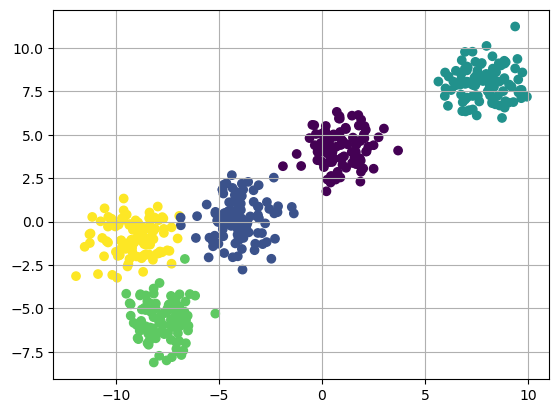

In [305]:
fig = plt.figure(0)
plt.grid(True)
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [306]:
k = 5

colors = ['green', 'yellow', 'blue', 'cyan', 'red']

clusters = {}

for idx in range(k):
    center = 10*(2*np.random.random((X.shape[1],)) -1 )
    points = []
    cluster = {
        'center' : center,
        'points' : [],
        'color' : colors[idx]
    }

    clusters[idx] = cluster


clusters

{0: {'center': array([-9.4044594 ,  7.21979948]),
  'points': [],
  'color': 'green'},
 1: {'center': array([-1.64356662,  5.8668203 ]),
  'points': [],
  'color': 'yellow'},
 2: {'center': array([-6.58579867, -2.07802843]),
  'points': [],
  'color': 'blue'},
 3: {'center': array([ 3.70683773, -1.62787238]),
  'points': [],
  'color': 'cyan'},
 4: {'center': array([-8.59345256, -3.58341053]),
  'points': [],
  'color': 'red'}}

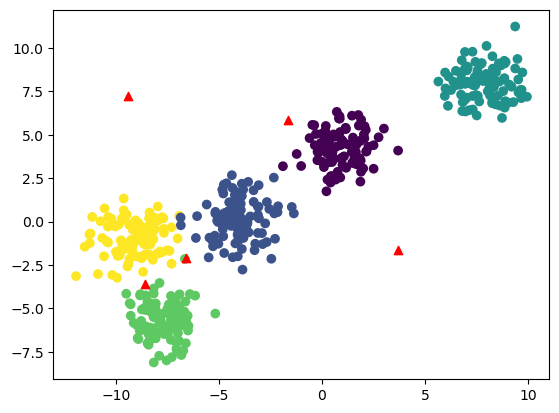

In [307]:
plt.scatter(X[:,0],X[:,1], c=y)

for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0], center[1], marker = '^', c = 'red')

plt.show()

In [308]:
def distance(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))

v1 = np.array([1,2])
v2 = np.array([3,4])

distance(v1,v2)

2.8284271247461903

In [309]:
## Implementing E step

def assign_clusters():
    for idx in range(X.shape[0]):
        dist = []
        curr_x = X[idx]

        for i in range(k):
            dis = distance(curr_x, clusters[i]['center'])
            dist.append(dis)
    
    curr_cluster = np.argmin(dist)
    clusters[curr_cluster]['points'].append(curr_x)


## Implementing M step

def update_clusters():
    for idx in range(k):
        pts = np.array(clusters[idx]['points'])
        if pts.shape[0] > 0:
            new_center = pts.mean(axis = 0)
            clusters[idx]['center'] = new_center
            clusters[idx]['points'] = []

def plot_clusters():
    for i in clusters:
        pts = np.array(clusters[i]['points'])

        try :
            plt.scatter(pts[:,0], pts[:,1], c = clusters[i]['color'])
        except:
            pass
        center = clusters[i]['center']
        plt.scatter(center[0], center[1], c = 'black', marker = '^')

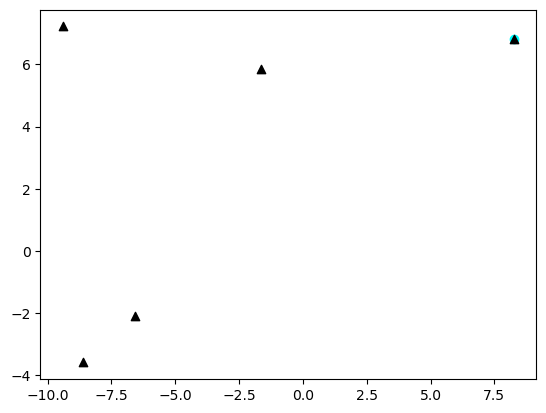

In [311]:
assign_clusters()
plot_clusters()
update_clusters()


## Random init improvements in K means

### Scikit learn K means

In [312]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=5)
X,y = make_blobs(n_samples=500, n_features=2, centers=5, random_state=3)

km.fit(X,y)

KMeans(n_clusters=5)

In [313]:
centers = km.cluster_centers_
labels = km.labels_
print(len(labels))
labels

500


array([3, 2, 4, 3, 3, 4, 1, 3, 2, 3, 2, 4, 2, 3, 4, 3, 2, 3, 3, 2, 0, 0,
       3, 4, 3, 0, 1, 1, 4, 1, 3, 1, 0, 0, 3, 0, 2, 2, 3, 0, 0, 0, 1, 1,
       4, 2, 2, 1, 1, 1, 2, 3, 1, 3, 3, 0, 3, 3, 2, 4, 2, 4, 4, 3, 1, 2,
       4, 4, 0, 4, 0, 3, 0, 3, 0, 4, 3, 1, 0, 0, 4, 0, 4, 1, 2, 1, 4, 2,
       1, 4, 1, 0, 3, 0, 0, 2, 3, 4, 4, 0, 2, 0, 4, 4, 2, 2, 2, 4, 4, 3,
       2, 1, 3, 2, 4, 0, 2, 1, 0, 4, 2, 4, 1, 3, 0, 1, 1, 1, 3, 3, 4, 4,
       3, 2, 2, 1, 4, 1, 4, 3, 3, 0, 4, 2, 1, 3, 2, 2, 3, 4, 3, 3, 4, 4,
       2, 0, 0, 1, 4, 3, 0, 2, 1, 0, 2, 0, 2, 0, 0, 0, 1, 3, 0, 2, 0, 1,
       3, 4, 2, 1, 2, 3, 2, 0, 1, 1, 0, 3, 4, 2, 0, 4, 1, 3, 1, 0, 4, 1,
       3, 3, 3, 0, 0, 2, 3, 1, 1, 3, 2, 3, 3, 3, 0, 2, 4, 2, 3, 3, 2, 1,
       4, 1, 1, 0, 3, 4, 3, 4, 1, 0, 4, 4, 3, 0, 3, 0, 4, 2, 4, 0, 0, 2,
       3, 3, 4, 4, 0, 2, 0, 3, 1, 2, 1, 3, 1, 1, 1, 1, 2, 0, 2, 3, 0, 2,
       1, 4, 2, 2, 2, 1, 3, 3, 4, 0, 0, 2, 4, 4, 3, 4, 1, 4, 2, 2, 1, 1,
       0, 1, 1, 2, 0, 3, 4, 0, 4, 1, 4, 4, 2, 3, 0,

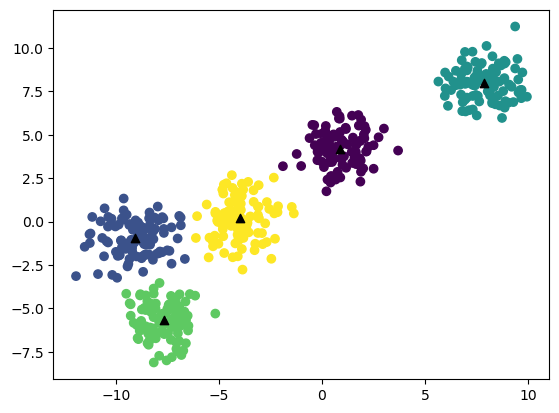

In [314]:
plt.scatter(X[:,0], X[:,1], c = labels)
plt.scatter(centers[:,0], centers[:,1], c='black', marker = '^')
plt.show()